In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import scipy.stats
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import os

pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline

In [ ]:
os.chdir('/content/gdrive/MyDrive/CourseDA')

In [ ]:
os.listdir()

['diabetes_prediction_dataset_.csv',
 'movies_metadata.csv',
 'ratings_small.csv']

In [ ]:
diabetes_data = pd.read_csv("diabetes_prediction_dataset_.csv")

In [ ]:
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [ ]:
diabetes_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,41.99,0.08,0.04,27.33,5.52,137.85,0.09
std,22.54,0.26,0.19,6.65,1.08,41.23,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.71,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.60,6.20,159.00,0.00
max,80.00,1.00,1.00,88.72,9.00,300.00,1.00


In [ ]:
diabetes_data['diabetes'].value_counts()

diabetes
0    9141
1     859
Name: count, dtype: int64

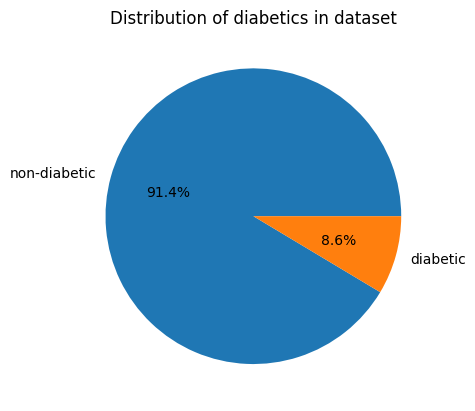

In [ ]:
plt.pie(diabetes_data['diabetes'].value_counts(), labels = ['non-diabetic', 'diabetic'],
       autopct = '%1.1f%%')
plt.title("Distribution of diabetics in dataset")
plt.show()

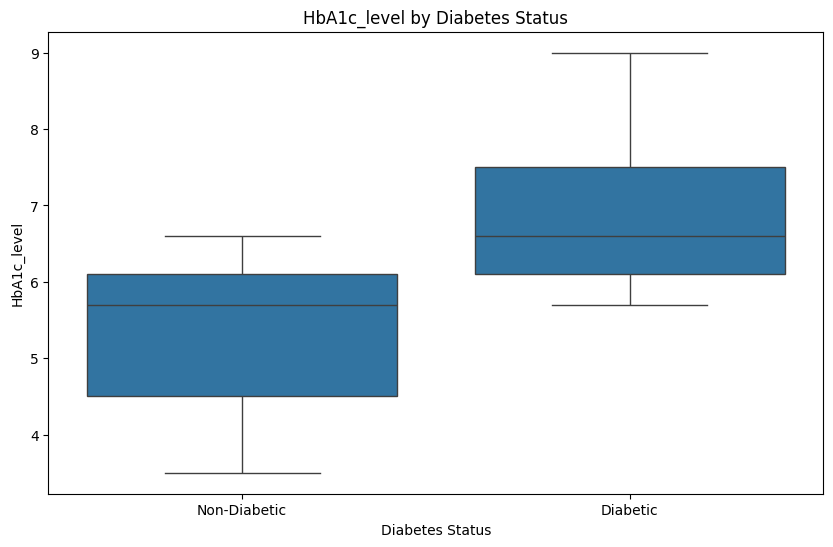

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=diabetes_data)
plt.title('HbA1c_level by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('HbA1c_level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])  # Adjust based on your 'diabetes' column encoding
plt.show()

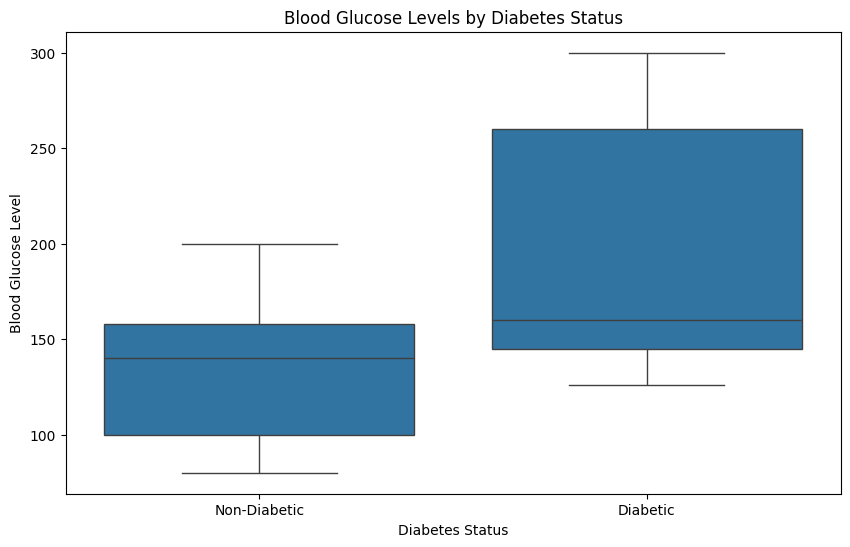

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=diabetes_data)
plt.title('Blood Glucose Levels by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Blood Glucose Level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])  # Adjust based on your 'diabetes' column encoding
plt.show()

In [ ]:
diabetes_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
diabetes_data['smoking_history'] = label_encoder.fit_transform(diabetes_data['smoking_history'])
diabetes_data['gender'] = label_encoder.fit_transform(diabetes_data['gender'])
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.00,0,1,4,25.19,6.60,140,0
1,0,54.00,0,0,0,27.32,6.60,80,0
2,1,28.00,0,0,4,27.32,5.70,158,0
3,0,36.00,0,0,1,23.45,5.00,155,0
4,1,76.00,1,1,1,20.14,4.80,155,0


In [ ]:
numeric_data = diabetes_data.select_dtypes(include='number')
print(numeric_data)

      gender   age  hypertension  heart_disease  smoking_history   bmi  \
0          0 80.00             0              1                4 25.19   
1          0 54.00             0              0                0 27.32   
2          1 28.00             0              0                4 27.32   
3          0 36.00             0              0                1 23.45   
4          1 76.00             1              1                1 20.14   
...      ...   ...           ...            ...              ...   ...   
9995       0  9.00             0              0                4 25.28   
9996       1 59.00             0              0                2 35.00   
9997       1  2.00             0              0                4 17.43   
9998       1 61.00             1              0                2 31.89   
9999       1 43.00             0              0                4 30.24   

      HbA1c_level  blood_glucose_level  diabetes  
0            6.60                  140         0  
1        

In [ ]:
# atribut to numerik
numerical_columns = ['age', 'bmi', 'HbA1c_level','smoking_history', 'blood_glucose_level']

In [ ]:
# Calculate Z-scores for numeric columns
z_scores = diabetes_data[numerical_columns].apply(zscore)

print(z_scores)

       age   bmi  HbA1c_level  smoking_history  blood_glucose_level
0     1.69 -0.32         1.00             0.96                 0.05
1     0.53 -0.00         1.00            -1.16                -1.40
2    -0.62 -0.00         0.17             0.96                 0.49
3    -0.27 -0.58        -0.48            -0.63                 0.42
4     1.51 -1.08        -0.67            -0.63                 0.42
...    ...   ...          ...              ...                  ...
9995 -1.46 -0.31         0.26             0.96                -0.19
9996  0.75  1.15         1.18            -0.10                 0.05
9997 -1.77 -1.49        -0.94             0.96                -0.29
9998  0.84  0.69         0.17            -0.10                 0.05
9999  0.04  0.44         1.00             0.96                -0.19

[10000 rows x 5 columns]


In [ ]:
# Define threshold for outlier detection (e.g., Z-Score > 3)
threshold = 3
# Find outliers
outliers = diabetes_data[z_scores > threshold]
print(outliers)

      gender  age  hypertension  heart_disease  smoking_history  bmi  \
0        NaN  NaN           NaN            NaN              NaN  NaN   
1        NaN  NaN           NaN            NaN              NaN  NaN   
2        NaN  NaN           NaN            NaN              NaN  NaN   
3        NaN  NaN           NaN            NaN              NaN  NaN   
4        NaN  NaN           NaN            NaN              NaN  NaN   
...      ...  ...           ...            ...              ...  ...   
9995     NaN  NaN           NaN            NaN              NaN  NaN   
9996     NaN  NaN           NaN            NaN              NaN  NaN   
9997     NaN  NaN           NaN            NaN              NaN  NaN   
9998     NaN  NaN           NaN            NaN              NaN  NaN   
9999     NaN  NaN           NaN            NaN              NaN  NaN   

      HbA1c_level  blood_glucose_level  diabetes  
0             NaN                  NaN       NaN  
1             NaN                

In [ ]:
# Count outliers
outliers_count = (z_scores.abs() > threshold).sum().sum()

print("Number of outliers:", outliers_count)

Number of outliers: 428


In [ ]:
# normalization


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
diabetes_data[numerical_columns] = scaler.fit_transform(diabetes_data[numerical_columns])

# Display the first few rows to verify the normalization
print(diabetes_data.head())

   gender  age  hypertension  heart_disease  smoking_history  bmi  \
0       0 1.00             0              1             0.80 0.19   
1       0 0.67             0              0             0.00 0.22   
2       1 0.35             0              0             0.80 0.22   
3       0 0.45             0              0             0.20 0.17   
4       1 0.95             1              1             0.20 0.13   

   HbA1c_level  blood_glucose_level  diabetes  
0         0.56                 0.27         0  
1         0.56                 0.00         0  
2         0.40                 0.35         0  
3         0.27                 0.34         0  
4         0.24                 0.34         0  


In [ ]:
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.00,0,1,0.80,0.19,0.56,0.27,0
1,0,0.67,0,0,0.00,0.22,0.56,0.00,0
2,1,0.35,0,0,0.80,0.22,0.40,0.35,0
3,0,0.45,0,0,0.20,0.17,0.27,0.34,0
4,1,0.95,1,1,0.20,0.13,0.24,0.34,0


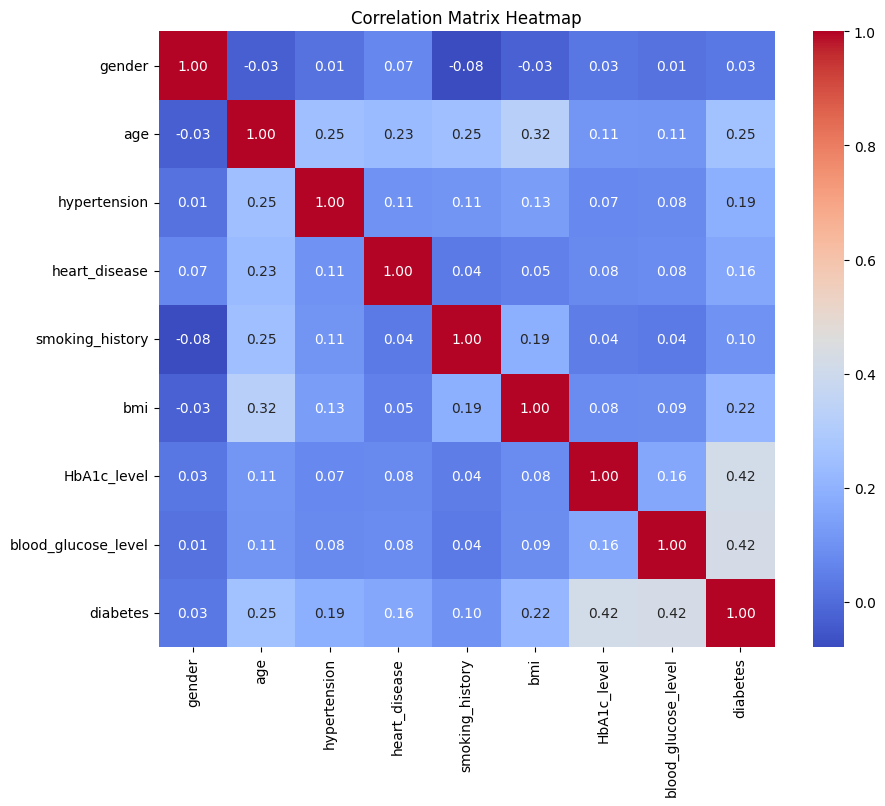

In [ ]:
# Calculate the correlation matrix
corr_matrix = diabetes_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size as desired
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

SPLIT DATA

In [ ]:
X = diabetes_data.drop(columns=['diabetes'], axis=1)
y = diabetes_data['diabetes']

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
X_train = pd.DataFrame((X_train_raw), columns=X_train_raw.columns)
X_test =  pd.DataFrame((X_test_raw), columns=X_test_raw.columns)
X_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
6252,1,0.76,0,0,0.20,0.17,0.55,0.34
4684,1,0.89,0,0,0.60,0.21,0.73,0.21
1731,0,0.40,0,0,0.00,0.22,0.56,0.02
4742,0,0.37,0,0,0.80,0.15,0.18,0.30
4521,0,0.34,0,0,0.60,0.12,0.27,0.55


DECISION TREE C4.5

In [ ]:
model = tree.DecisionTreeClassifier()

NameError: name 'tree' is not defined

In [ ]:
model.fit(X_train, y_train)

NameError: name 'model' is not defined

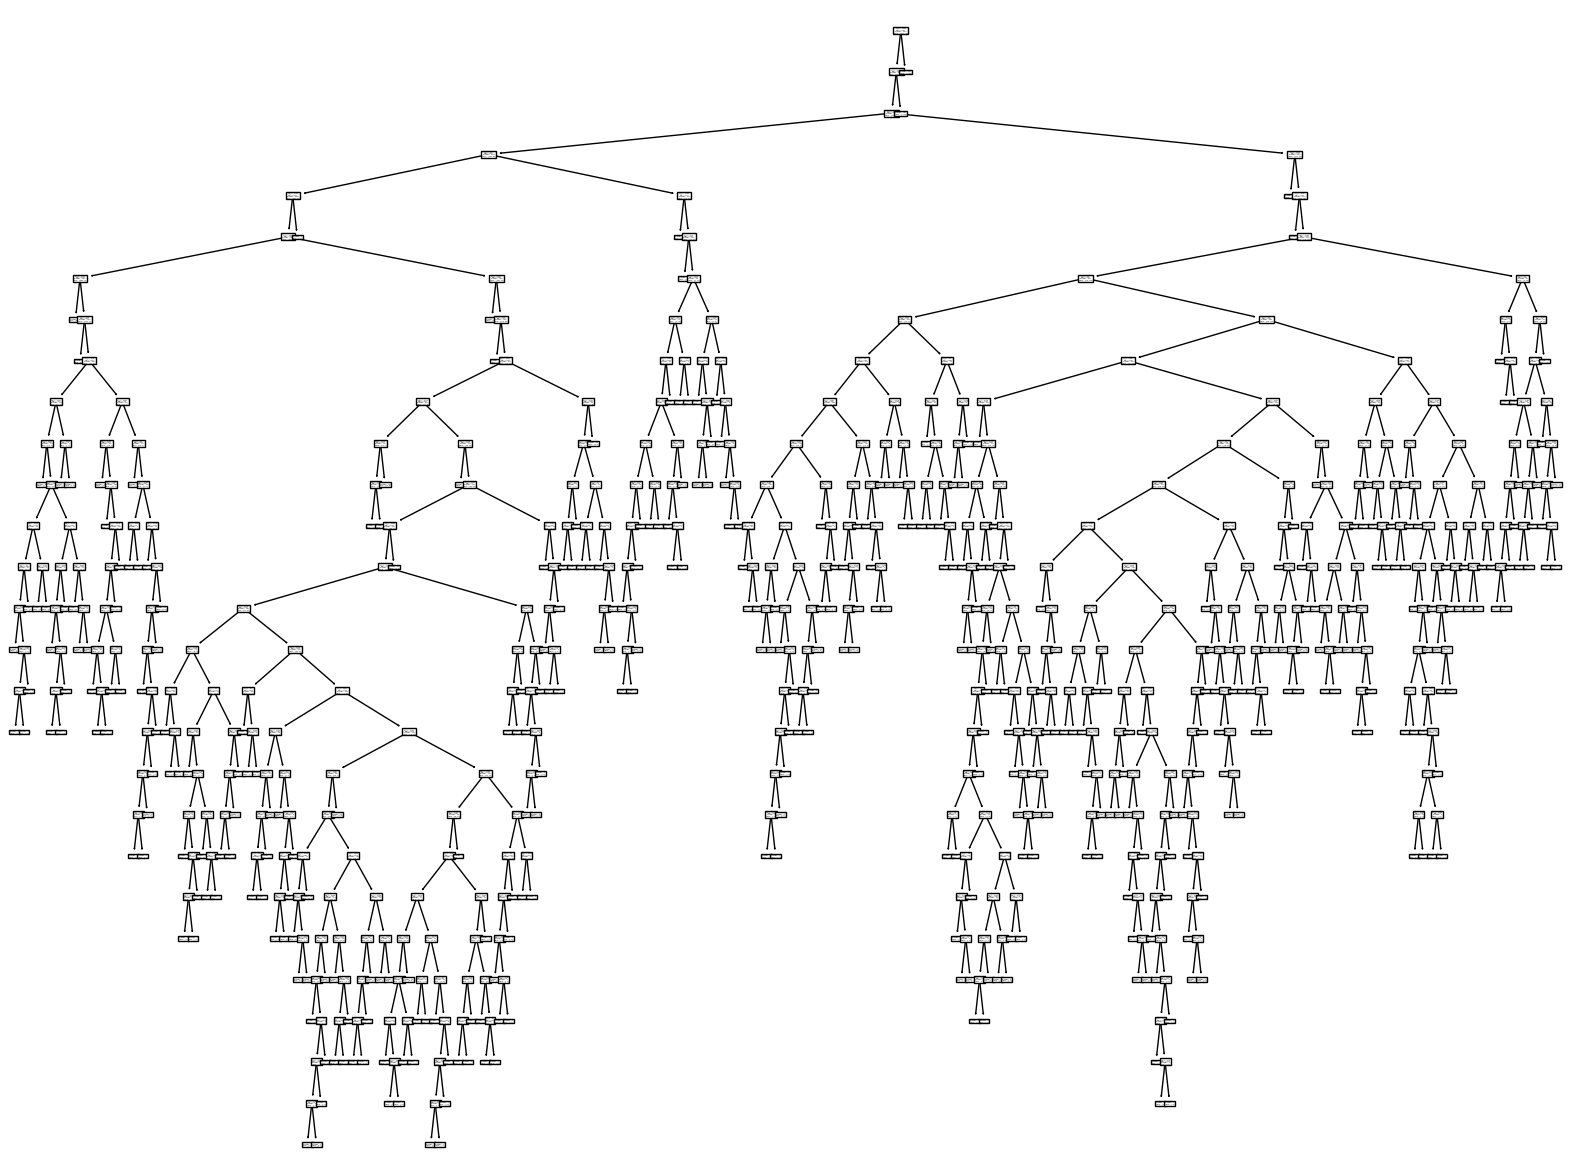

In [ ]:
fig = plt.figure(figsize=(20,15))
tree.plot_tree(model);

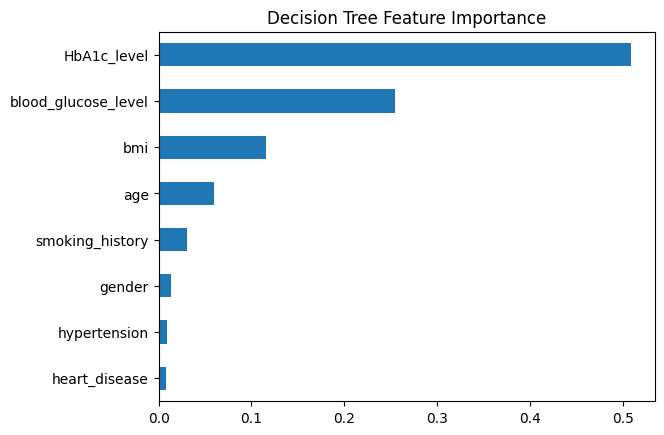

In [ ]:
feature_importances = pd.Series(model.feature_importances_, model.feature_names_in_).sort_values()
feature_importances.plot.barh();
plt.title('Decision Tree Feature Importance');

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_train= model.predict(X_train)

In [ ]:
train_decision_tree_report = classification_report(y_train, y_pred_train)
print(train_decision_tree_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8234
           1       1.00      1.00      1.00       766

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



In [ ]:
test_decision_tree_report = classification_report(y_test, y_pred_test)
print(test_decision_tree_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       907
           1       0.72      0.71      0.71        93

    accuracy                           0.95      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.95      0.95      0.95      1000



In [ ]:
test_decision_tree_report = accuracy_score(y_test,y_pred_test)
print(test_decision_tree_report)

0.947


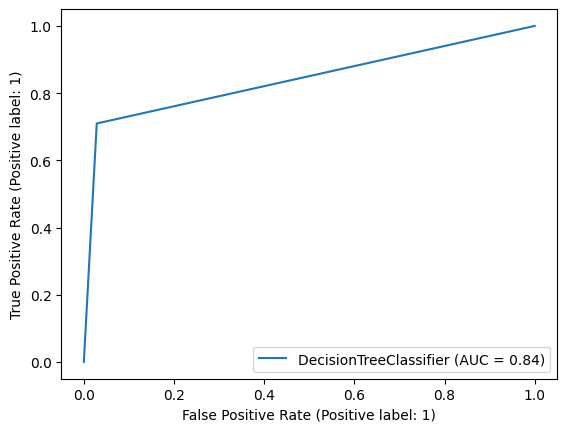

In [ ]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_test)

0.8405057438560302

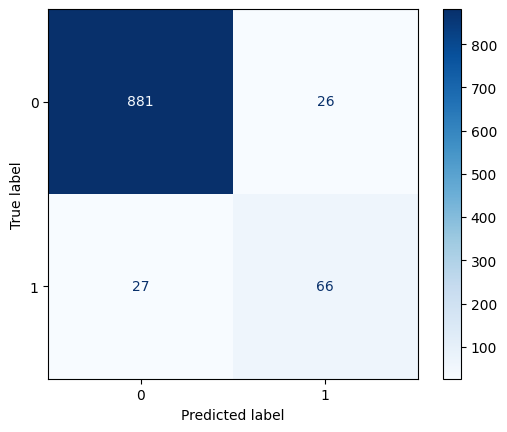

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_);
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred_test, y_true=y_test, display_labels=model.classes_, cmap='Blues');

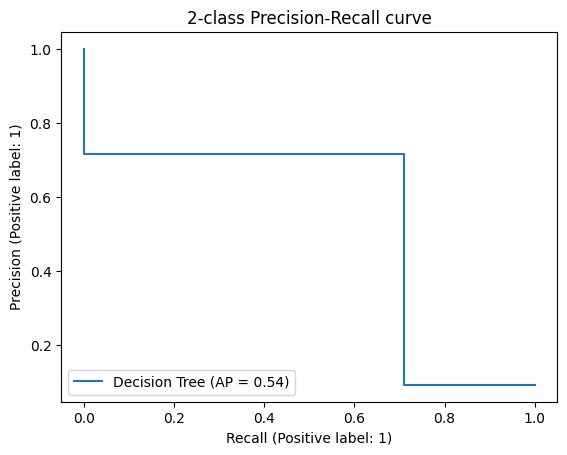

In [ ]:
display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name="Decision Tree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

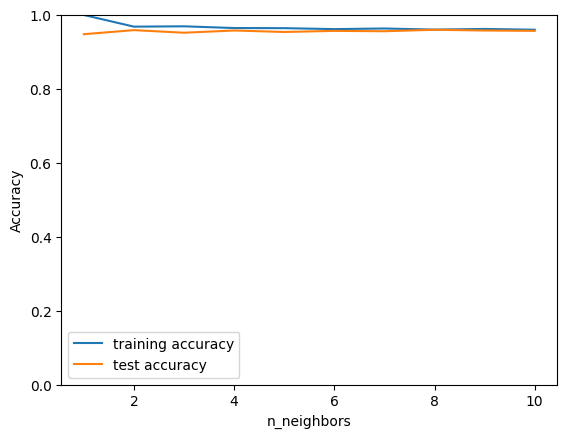

In [ ]:
training_accuracy = []
test_accuracy = []

# n_neighbors
possible_neighbors = range(1, 11)

for n_neighbors in possible_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # training accuracy
    training_accuracy.append(clf.score(X_train, y_train))

    # testing accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(possible_neighbors, training_accuracy, label="training accuracy")
plt.plot(possible_neighbors, test_accuracy, label="test accuracy");
plt.ylim((0,1))
plt.ylabel("Accuracy");
plt.xlabel("n_neighbors");
plt.legend();

In [ ]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)

y_pred_test2= model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8234
           1       0.97      0.57      0.72       766

    accuracy                           0.96      9000
   macro avg       0.96      0.78      0.85      9000
weighted avg       0.96      0.96      0.96      9000



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       907
           1       0.72      0.71      0.71        93

    accuracy                           0.95      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.95      0.95      0.95      1000



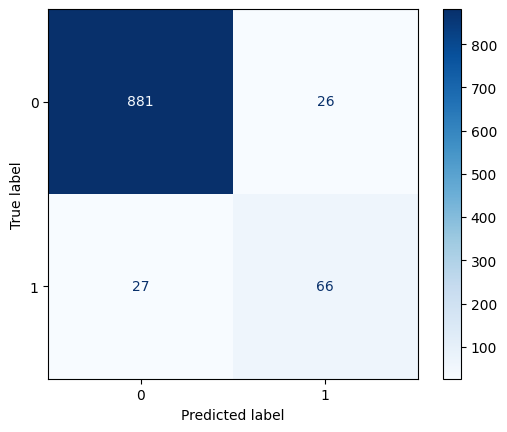

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_);
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred_test, y_true=y_test, display_labels=model.classes_, cmap='Blues');

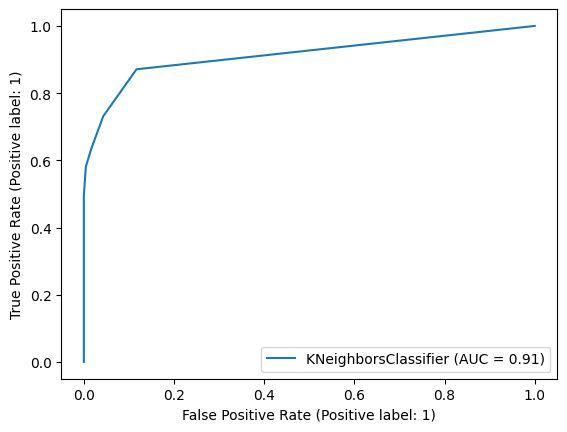

In [ ]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_test)

0.8405057438560302

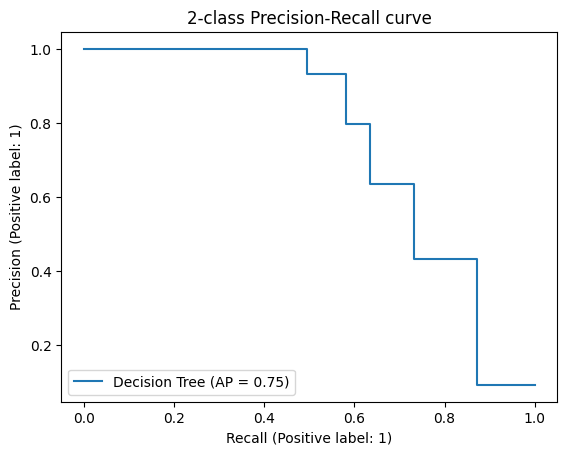

In [ ]:
display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name="Decision Tree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:
# algoritma random forest
clf = RandomForestClassifier(n_estimators=10, random_state=42)

# model latih
clf.fit(X_train, y_train)

# untuk testing
y_pred = clf.predict(X_test)

In [ ]:
# evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

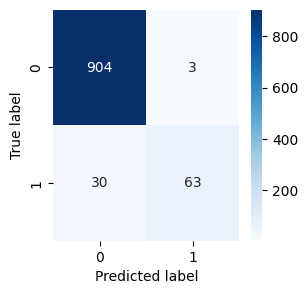

Accuracy: 0.967
F1 Score: 0.7924528301886793


In [ ]:
# Plot confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# accuracy dan F1 score
print('Accuracy:', accuracy)
print('F1 Score:', f1)

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
naiv = GaussianNB()
naiv.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = naiv.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

Mendapatkan probabilitas yang dihasilkan model

In [ ]:
naiv.predict_proba(X_test)

array([[9.81893971e-01, 1.81060288e-02],
       [8.82659696e-01, 1.17340304e-01],
       [9.99232278e-01, 7.67722120e-04],
       ...,
       [9.99270799e-01, 7.29201355e-04],
       [9.99689175e-01, 3.10825129e-04],
       [9.99955449e-01, 4.45513467e-05]])

evaluasi naive bayes

berikut jumlah data diprediksi secara benar dan salah

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[845  62]
 [ 33  60]]


In [ ]:
akurasi = classification_report(y_test,y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       907
           1       0.49      0.65      0.56        93

    accuracy                           0.91      1000
   macro avg       0.73      0.79      0.75      1000
weighted avg       0.92      0.91      0.91      1000



In [ ]:
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat akurasi: %d persen"%(akurasi*100))

Tingkat akurasi: 90 persen


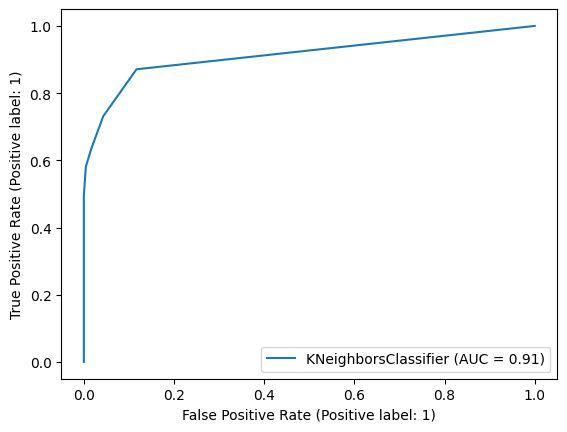